In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from collections import Counter
import seaborn as sns

5. In der forsa-Umfrage (forsa Gesellschaft für Sozialforschung und statistische Analysen) werden jede Woche zufällig ausgewählte deutsche Bürger befragt, was Sie wählen würden, wenn
am nächsten Sonntag Bundestagswahl wäre. Am 30.10.2019 wurden 2501 Personen gefragt. Das Ergebnis der Umfrage ist in Sonntagsfrage.csv in der ersten Spalte gegeben. Nehmen Sie an,
Sie hätten ebenfalls das Alter der Befragten zur Verfügung.
    
    (a)überprüfen Sie,ob das Wahlergebnis der CDU/CSU drei Wochen nach der Bundestagswahl 2013 signifikant von dem Wahlergebnis    abweicht (41.5%)!
    
    (b) Visualisieren Sie den Datensatz
    
    (c) Unterteilen Sie die Befragten in zwei Kategorien: CDU/CSU Wähler und restliche Wähler. Überprüfen Sie, ob sich das Alter der befragten Personen signifikant unterscheidet! Wa ̈hlen Sie einen geeignet test in R und interpretieren Sie das Ergebnis

In [3]:
Sonntagsfrage = pd.read_csv("./data/Sonntagsfrage.csv")
Sonntagsfrage.head(5)

,Person,Wahl,Alter
0,1,CDU/CSU,47
1,2,CDU/CSU,57
2,3,SPD,48
3,4,AfD,32
4,5,CDU/CSU,58


In [4]:
# 5a) Significancetest
#Interprete result
#H0: The result of the two votes do not differ significantly
#p <= alpha: reject H0, not siginificant.
#p > alpha: fail to reject H0, significant.
# alpha = 0.05
countObject = Counter(Sonntagsfrage["Wahl"])
percentageCDUCSU = countObject['CDU/CSU'] / Sonntagsfrage["Wahl"].size
print("CDU/CSU Prozent: " + str(percentageCDUCSU))

p = stats.binom_test(countObject['CDU/CSU'], Sonntagsfrage["Wahl"].size, p=0.415)

print('p = {}'.format(round(p, 2)))
alpha = 0.05
if p > alpha:
    print('Samples do not significantly differ (fail to reject H0)')
else:
    print('Samples do significantly differ (reject H0)')
    
# The voting results do not significantly differ

CDU/CSU Prozent: 0.42103158736505397
p = 0.54
Samples do not significantly differ (fail to reject H0)


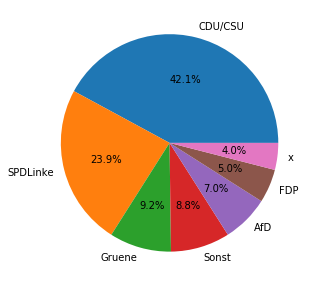

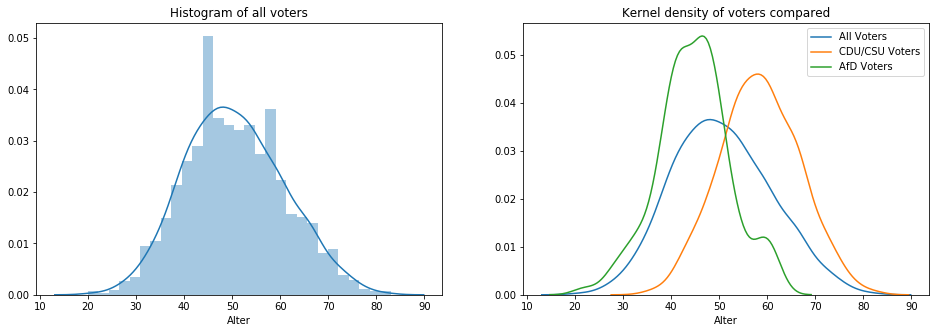

In [6]:
# 5b)
# Data to plot
labels = ['CDU/CSU', 'SPD' 'Linke', 'Gruene', 'Sonst', 'AfD', 'FDP', 'x']
sizes = [countObject['CDU/CSU'], countObject['SPD'], countObject['LINKE'], 
         countObject['GRUENE'], countObject['Sonst'], countObject['AfD'], countObject['FDP']]

# Plot tv-like distribution of parties
fig, axs = plt.subplots(figsize=(8,5))
plt.pie(sizes, labels=labels,autopct='%1.1f%%', labeldistance=1.1)
plt.show()

# Histogram age
fig, (axs1, axs2) = plt.subplots(1, 2, figsize = (16, 5))
sns.distplot(Sonntagsfrage['Alter'], label = 'All Voters', hist = False, ax = axs2).set_title(
    'Kernel density of voters compared')
sns.distplot(Sonntagsfrage[Sonntagsfrage['Wahl'] == 'CDU/CSU']['Alter'], label = 'CDU/CSU Voters', 
             hist = False, ax = axs2)
sns.distplot(Sonntagsfrage[Sonntagsfrage['Wahl'] == 'AfD']['Alter'], label = 'AfD Voters', hist = False, ax = axs2)
sns.distplot(Sonntagsfrage['Alter'], label = 'All Voters', ax = axs1).set_title('Histogram of all voters')
plt.legend()

In [94]:
# 5c)
# Significancetest
#Interprete result
#H0: The age of the voters do not significantly differ
#p <= alpha: reject H0, not siginificant.
#p > alpha: fail to reject H0, significant.
# alpha = 0.05

# select relevant data
mask = (Sonntagsfrage['Wahl'] == 'CDU/CSU' )
cdu_voters = Sonntagsfrage.loc[mask]
mask = (Sonntagsfrage['Wahl'] != 'CDU/CSU' )
other_voters = Sonntagsfrage.loc[mask]

stat, p = stats.ttest_ind(cdu_voters["Alter"], other_voters["Alter"])

print('Statistics = {}, p = {}'.format(round(stat, 2), round(p, 2)))
alpha = 0.05
if p > alpha:
    print('Samples do not significantly differ (fail to reject H0)')
else:
    print('Samples do significantly differ (reject H0)')
    
# The age seems to be significantly different as pvalue = 0.00000000000... < alpha = 0.05

Statistics = 42.54, p = 0.0
Samples do significantly differ (reject H0)


6. Importieren Sie den Datensatz von EuroStat: market size.csv. Der Datensatz erfasst die (6) Gesamtmenge der erzeugten Energie in GWh der 28 Mitgliedsstaaten der EU für 1999 - 2010. Untersuchen Sie, ob es zwischen der produzierten Strommenge 1999 und der produzierten Strommenge in 2010 einen signifikanten Unterschied gibt! Visualisieren Sie die Daten der beiden Jahre
und alle Jahre und führen sie einen geeigneten Test durch! Interpretieren Sie das Ergebnis.

In [27]:
market_size = pd.read_csv("./data/market_size.csv", sep=',' , encoding='latin-1')
market_size

,TIME,GEO,UNIT,PRODUCT,INDIC_NRG,Value
0,1999,Belgien,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,84514
1,1999,Tschechische Republik,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,64694
2,1999,Dänemark,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,38921
3,1999,Deutschland (bis 1990 früheres Gebiet der BRD),Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,556300
4,1999,Estland,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,8281
...,...,...,...,...,...,...
331,2010,Finnland,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,80668
332,2010,Schweden,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,148609
333,2010,Vereinigtes Königreich,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,381771
334,2010,Norwegen,Gigawattstunde,Elektrizität,Bruttoelektrizitätserzeugung insgesamt,123640


In [101]:
# Significancetest
#Interprete result
#p <= alpha: reject H0, not siginificant.
#p > alpha: fail to reject H0, significant.
# alpha = 0.05

# select relevant data
market_size_1999 = market_size[market_size["TIME"] == 1999]['Value']
market_size_2010 = market_size[market_size["TIME"] == 2010]['Value']

stat, p = stats.ttest_ind(market_size_1999, market_size_2010)

print('Statistics = {}, p = {}'.format(round(stat, 2), round(p, 2)))
alpha = 0.05
if p > alpha:
    print('Samples do not significantly differ (fail to reject H0)')
else:
    print('Samples do significantly differ (reject H0)')
    
# The samples do not significantly differ as pvalue = 0.6983 > alpha = 0.05. 
# From this we can say that the produced energy (2010) does not significantly differ from 1999

Statistics = -0.39, p = 0.7
Samples do not significantly differ (fail to reject H0)


Text(0.5, 1.0, 'Histogram: Power output 1990')

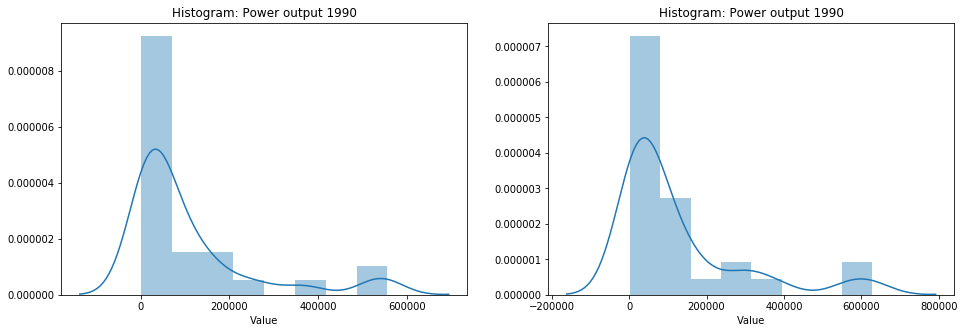

In [66]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize = (16, 5))
sns.distplot(market_size_1999, ax = axs1).set_title('Histogram: Power output 1990')
sns.distplot(market_size_2010, ax = axs2).set_title('Histogram: Power output 1990')

Text(0.5, 1, 'Average power output between 1999 and 2010')

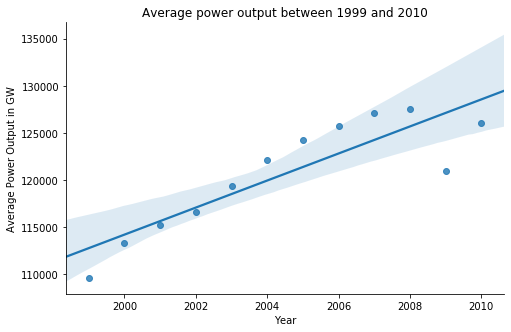

In [49]:
#Grouping the data by year and calculating the mean
market_size_mean = market_size.groupby(['TIME']).mean()
market_size_mean.reset_index(level=0, inplace = True)
sns.lmplot(x = 'TIME', y = 'Value', data = market_size_mean, height=4.5, aspect=1.6)
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Average Power Output in GW')
ax.set_title('Average power output between 1999 and 2010')

Text(0.5, 1.0, 'Average Power Output by State')

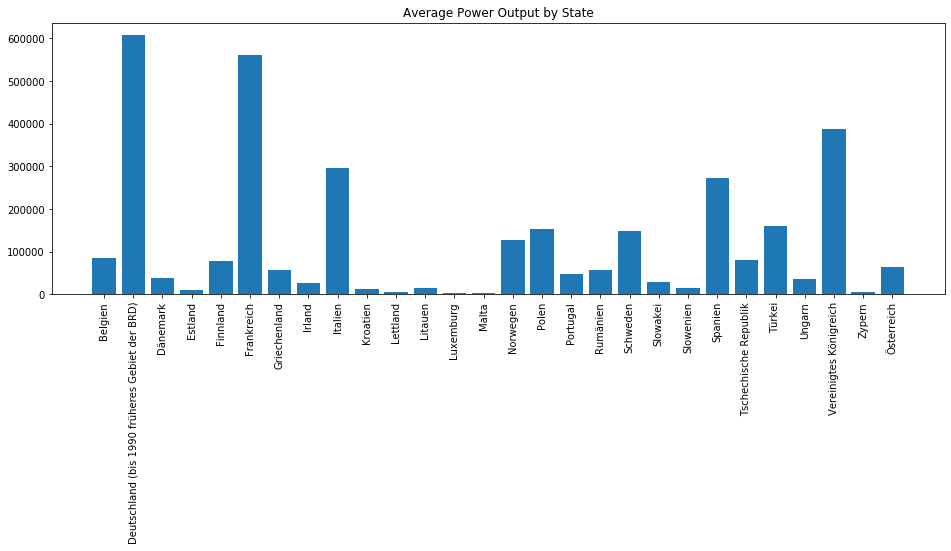

In [65]:
market_size_mean_geo = market_size.groupby(['GEO']).mean()
market_size_mean_geo.reset_index(level=0, inplace = True)

fig, ax = plt.subplots(figsize = (16, 5))
plt.bar(market_size_mean_geo['GEO'], market_size_mean_geo['Value'])
plt.xticks(rotation='vertical')
plt.title('Average Power Output by State')